# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model. - A linear approximation of a causal relationship between two or more variables.
- What type of machine learning is linear regression? - Linear regression is the supervised machine learning model.
- What is a “line of best fit” using the OLS method? - The "line of best fit" is the ordinary least squares line which minimizes the sum of squares error (SSE), which primarily relies on the overall length of residuals.
- What is the difference between correlation and regression? - Correlation focuses simply on associations or relationships between one variable and another, while regression focuses on how causality, and how changes in one variable directly affect another.
- Describe a scenario when you would use linear regression and why you would use it. - I would use linear regression to see the relationship between poverty rates and crime rates, and whether poverty rates, the independent variable, can predict crime rates, the dependent variable. I would use it because there is no directly causal relationship between the two variables, leaving ambiguity in this crucial area that linear regression can address.


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity - The pattern of data points resembles a line.
- Normality - We assume the error term is normally-distributed.
- Homoscedasticity - Each error term should have equal variance.
- No multicollinearity - No two variables can be used to predict each other.
- No endogeneity - There is no relationship between the independent variable and the error.
- No autocorrelation - Errors are assumed to be uncorrelated. 

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0) - The starting point for our data, at which point the independent variable has not yet taken effect.
- Coefficient of Independent Variable (B1) - The the quantitative effect of a one unit increase in the independent variable.
- Standard Error - How different the population mean is likely to be from a sample mean.
- T-Statistic - The ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. 
- P-Value of T-Statistic (from the independent variable) - The chance of finding a value at least as extreme as the one found when the independent variable is used as a predictor.


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared - How much variability in the data can be explained by the regression.
- Adjusted R-squared - Allows us to explain more variability in the data through adding more variables, while also penalizing the excessive use of variables that do not explain much.


In [1]:
# Step 5:




# 1. In this example, what is the name of the dependent variable and what is the name of the independent variable?

# The independent variable is years of experience, and the dependent variable is salary.

# 2. In this example, how much of the variability in the data is explained by the model?

# 96%

# 3. What is the p-value of the t-statistic in this example? Is this result considered to be statistically significant?

# 0.000. This is considered to be statistically significant, since it is below our significance level of 0.05.

# 4. What is the intercept/constant?

# 2.579e+04

# 5. What is the coefficient of the independent variable?

# 9449.9623

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [2]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

sns.set()

In [3]:
# load data
house_df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

#### Spend time exploring the data and looking for relationships between variables. 

In [6]:
# explore data below (you will need to make new cells)

<Axes: xlabel='sqft_above', ylabel='sqft_living'>

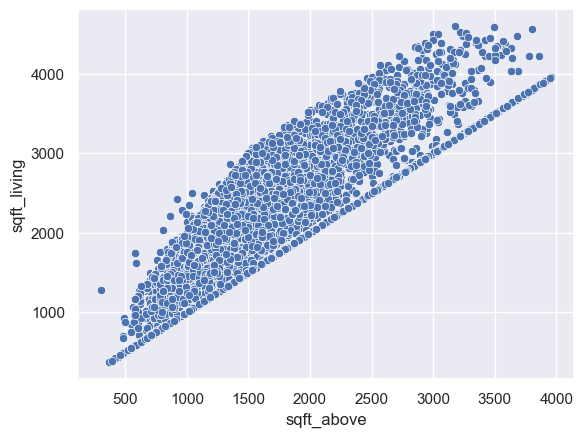

In [7]:
sns.scatterplot(x=house_df['sqft_above'], y=house_df['sqft_living'])

<Axes: xlabel='price', ylabel='grade'>

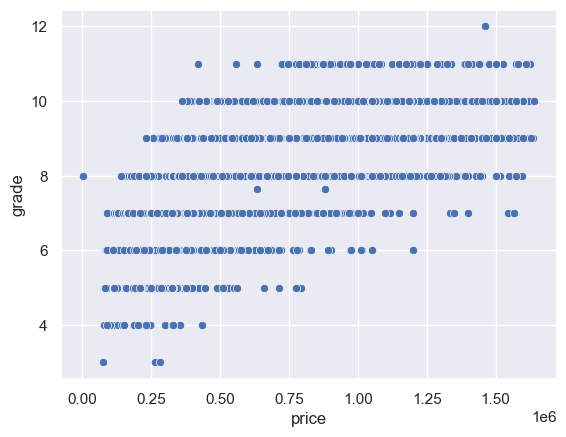

In [8]:
sns.scatterplot(x=house_df['price'], y=house_df['grade'])

<Axes: xlabel='price', ylabel='sqft_above'>

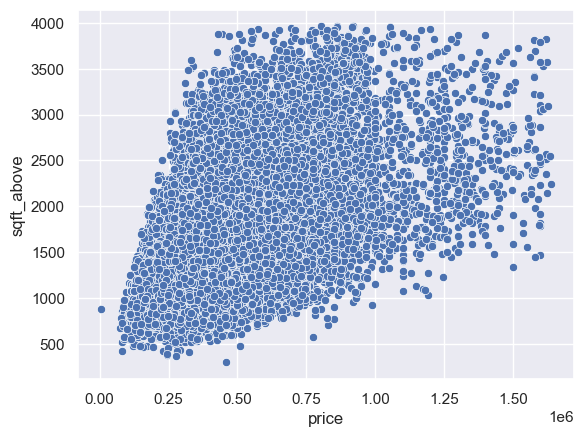

In [9]:
sns.scatterplot(x=house_df['price'], y=house_df['sqft_above'])

### Step 3: Determine independent and dependent variable

In [10]:
# set X - sqft_above

x1 = house_df['sqft_above']

# set Y - sqft_living

y = house_df['sqft_living']


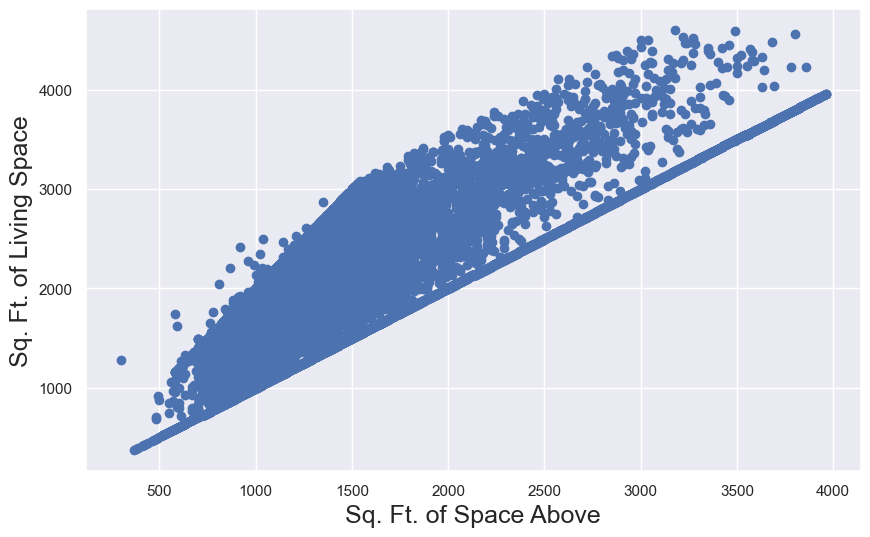

In [11]:
# visualize relationship between X and Y
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Sq. Ft. of Space Above', fontsize=18)
plt.ylabel('Sq. Ft. of Living Space', fontsize=18);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [12]:
# fit model to X and Y variables (you will need to make more cells)
x = sm.add_constant(x1)

In [13]:
results = sm.OLS(y,x).fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 5.207e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        14:45:50   Log-Likelihood:            -1.5079e+05
No. Observations:               20456   AIC:                         3.016e+05
Df Residuals:                   20454   BIC:                         3.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.4338      7.138     60.722      0.000     419.443     447.425
sqft_above     0.8985      0.004    228.181      0.000       0.891       0.906
==============================================================================
Omnibus:                     3567.227   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5731.322
Skew:                           1.266   Prob(JB):                         0.00
Kurtosis:                       3.563   Cond. No.                     4.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [15]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared - Our model explains 0.718 percent of the variability in the data.
- Coefficient of independent variable - For every 1 unit increase in sqft_above, there is a predicited increase of 0.8985 in sqft_living.
- P-value of T-statistic - The population mean is statistically significant.
- P-value of F-statistic - The population variance is statistically significant.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [16]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_above':[1100, 1500]})
new_df

,constant,sqft_above
0,1,1100
1,1,1500


In [17]:
predictions = results.predict(new_df)
predictions

0    1421.743947
1    1781.129444
dtype: float64

In [18]:
new_df['sqft_living_predictions'] = results.predict(new_df)
new_df

,constant,sqft_above,sqft_living_predictions
0,1,1100,1421.743947
1,1,1500,1781.129444


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [19]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
x1 = house_df[['sqft_above', 'price']]

y = house_df['sqft_living']


In [20]:
x1

,sqft_above,price
0,1180.0,221900.0
1,2170.0,538000.0
2,770.0,180000.0
3,1050.0,604000.0
4,1680.0,510000.0
...,...,...
20451,1180.0,475000.0
20452,1530.0,360000.0
20453,2310.0,400000.0
20454,1600.0,400000.0


### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [21]:
# fit new regression model (you will need to make more cells)
x = sm.add_constant(x1)

In [22]:
results = sm.OLS(y,x).fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 3.308e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        14:45:51   Log-Likelihood:            -1.4897e+05
No. Observations:               20456   AIC:                         2.979e+05
Df Residuals:                   20453   BIC:                         2.980e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.1061      6.905     42.303      0.000     278.572     305.641
sqft_above     0.7654      0.004    183.344      0.000       0.757       0.774
price          0.0007   1.19e-05     63.063      0.000       0.001       0.001
==============================================================================
Omnibus:                     2968.788   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4457.004
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       3.806   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared - Our model explains 76.4 % of the variability in the data.
- Adjusted R-squared - Since Adjusted R-squared did not go down from R-squared, our new variable added value to the model.
- Coefficient of independent variables - For every one-unit increase in square feet of space above, there is a predicted increase of 0.7654 in square feet of living space, and a predicted increase of 0.0007 for every one-unit increase in price.
- P-value of T-statistic - Since our p-value is 0.000, the individual variables are statistically significant.
- P-value of F-statistic - Since our p-value is 0.00, our model is statistically significant.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [24]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_above':[1100, 1500], 'price':[1, 1.50]})
new_df

,constant,sqft_above,price
0,1,1100,1.0
1,1,1500,1.5


In [25]:
predictions = results.predict(new_df)
predictions

0    1134.096970
1    1440.275562
dtype: float64

In [26]:
new_df['sqft_living_predictions'] = results.predict(new_df)
new_df

,constant,sqft_above,price,sqft_living_predictions
0,1,1100,1.0,1134.096970
1,1,1500,1.5,1440.275562


### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [27]:
# create new markdown cell and write down your observations
# Our new model had predicted values vastly smaller than those of our simple linear regression model, most likely because our lower prices reduced the prediction for square feet of living space.

# Part 4 - Multivariate Time Series Analysis

In [28]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 